In [32]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [33]:
#Read csv to pandas
birth_data = pd.read_csv('../Data/us_births_2016_2021.csv')
birth_data.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


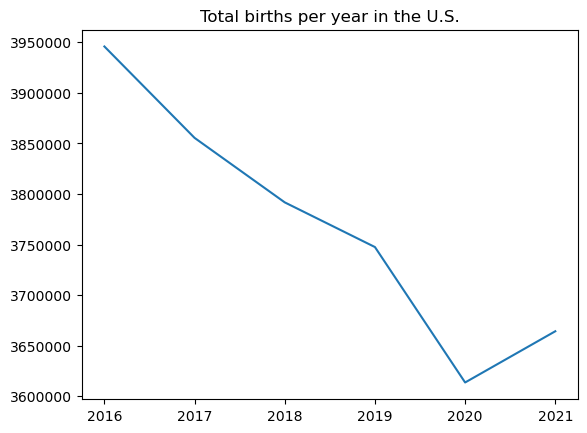

In [34]:
#Plot total births in the country from 2016 to 2021
total_births_per_year = birth_data.groupby('Year')['Number of Births'].sum()

plt.ticklabel_format(style='plain')
plt.title("Total births per year in the U.S.")
plt.plot(total_births_per_year.index, total_births_per_year)
#Save Image
plt.savefig("../Visuals/TotalBirthsUS.png")
plt.show()

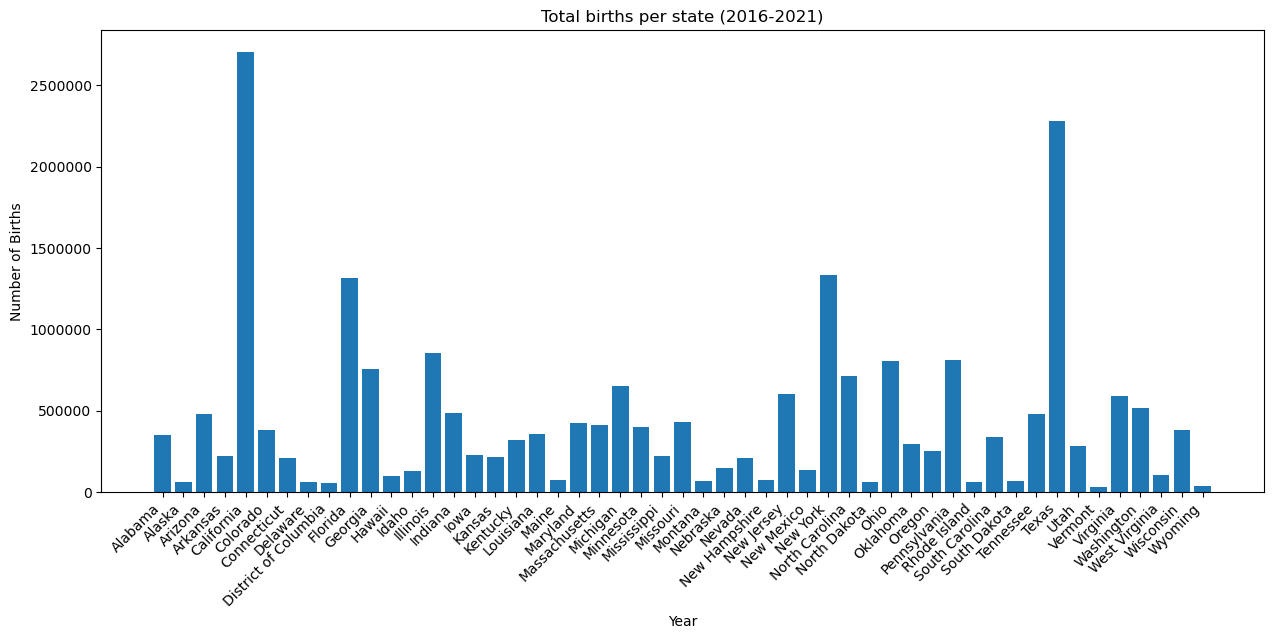

,State,Number of Births
0,Alabama,350169
1,Alaska,60398
2,Arizona,481353
3,Arkansas,220592
4,California,2702751


In [35]:
#Grouping all rows for each state together to make a new dataframe
birth_data_state = pd.DataFrame(birth_data.groupby('State')['Number of Births'].sum())
birth_data_state = birth_data_state.reset_index()
#This bar chart shows total number of births for each state from 2016 to 2021
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain')
plt.title("Total births per state (2016-2021)")
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(rotation=45, ha='right')
plt.bar(birth_data_state['State'], birth_data_state['Number of Births'])
#Save Image
plt.savefig("../Visuals/TotalBirthsbyState.png")
plt.show()
#check new dataframe
birth_data_state.head(5)

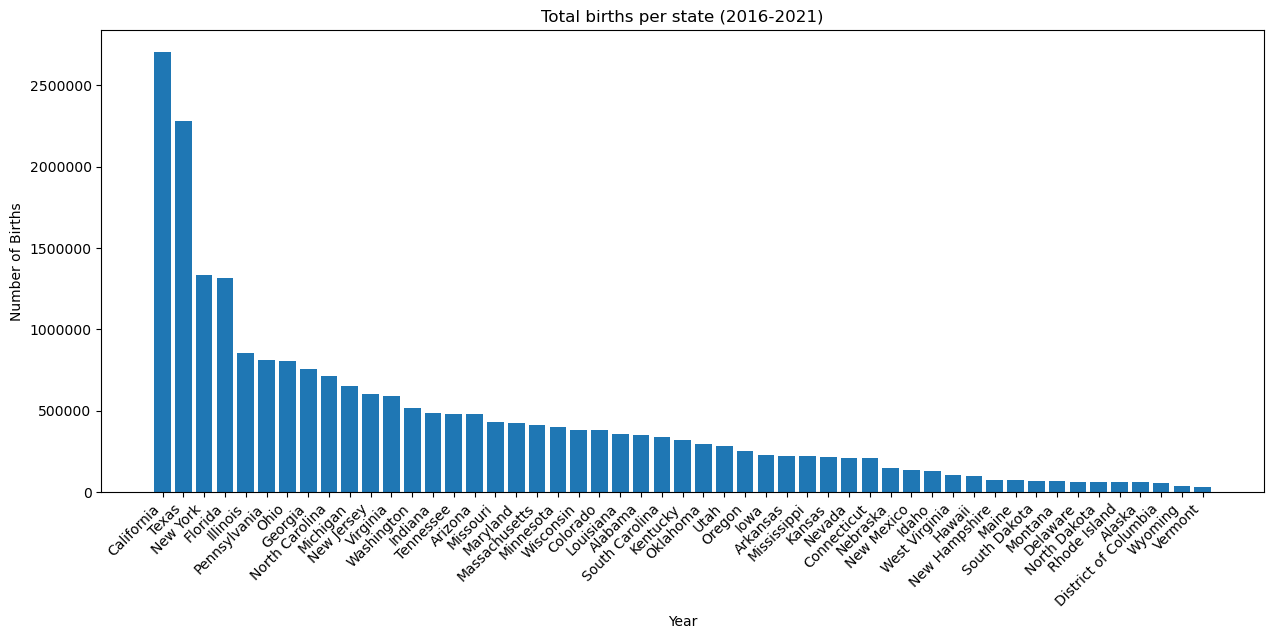

,State,Number of Births
4,California,2702751
43,Texas,2278104
32,New York,1331877
9,Florida,1316127
13,Illinois,854265


In [36]:
#This bar chart shows total number of births for each state from 2016 to 2021
#Sorted from largest to greatest instead of alphabetical order
sorted_birth_data_state =  birth_data_state.sort_values(['Number of Births'], ascending=False)
#Plot parametes
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain')
plt.title("Total births per state (2016-2021)")
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(rotation=45, ha='right')
plt.bar(sorted_birth_data_state['State'], sorted_birth_data_state['Number of Births'])
#Save Image
plt.savefig("../Visuals/TotalBirthsbyStateSorted.png")
plt.show()
#check new dataframe
sorted_birth_data_state.head()


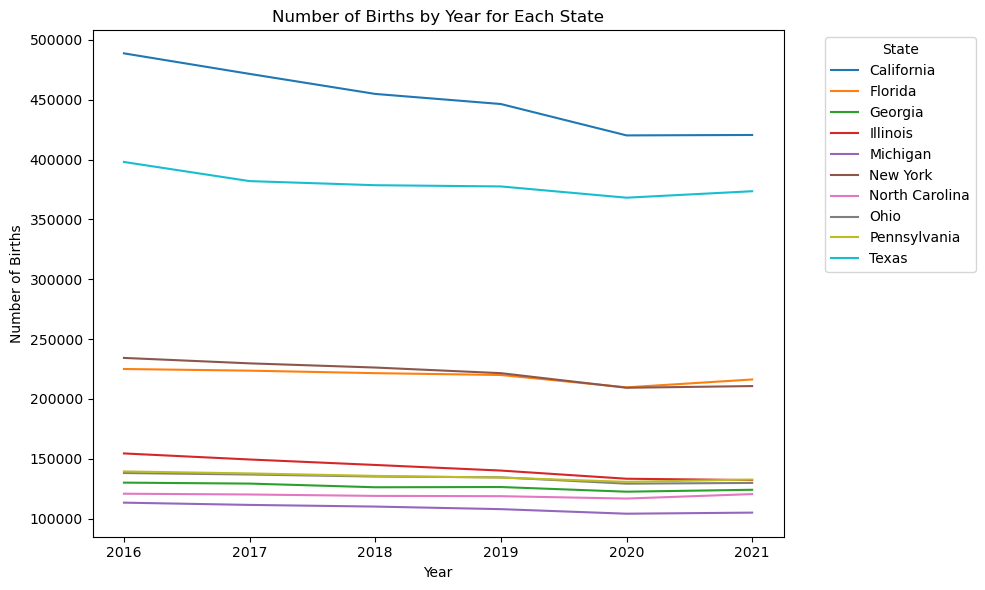

In [37]:
#Create dataframe to look at total births per year per state, only select top 10 states
birth_data_SY = pd.DataFrame(birth_data.groupby(['State','Year'])['Number of Births'].sum()).reset_index().nlargest(60, 'Number of Births')
# Pivot the dataframe 
pivot_df = birth_data_SY.pivot(index='Year', columns='State', values='Number of Births')
# Loop through each state and plot its data
plt.figure(figsize=(10, 6))
for state in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[state], label=state)
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births by Year for Each State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.tight_layout()
#Save Image
plt.savefig("../Visuals/BirthsbyStateandYear.png")
plt.show()


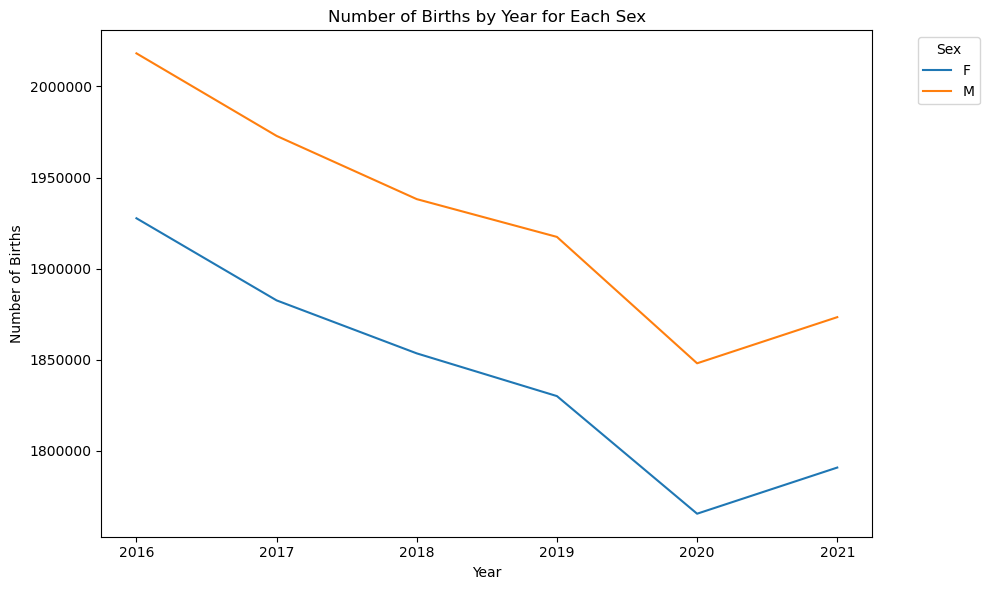

In [38]:
#Create dataframe to compare sex of newborns from 2016-2021
birth_data_YG = pd.DataFrame(birth_data.groupby(['Gender','Year'])['Number of Births'].sum()).reset_index()
# Pivot the dataframe
pivot_df = birth_data_YG.pivot(index='Year', columns='Gender', values='Number of Births')
# Loop through each sex and plot its data
plt.figure(figsize=(10, 6))
for gender in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[gender], label=gender)
# Add labels and title
plt.ticklabel_format(style='plain')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births by Year for Each Sex')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.tight_layout()
#Save Image
plt.savefig("../Visuals/BirthsbyYearandSex.png")
plt.show()


In [39]:
#Create dataframe to look at the change in number of births from each year and the total change
# Filter the DataFrame to include only data from 2018 to 2021
years = [2018,2019,2020,2021]
df_filtered = birth_data[birth_data['Year'].isin(years)]
# Pivot the table
pivot_df = df_filtered.pivot_table(index='State', columns='Year', values='Number of Births')
pivot_df['change_2018_2019'] = pivot_df[2019] - pivot_df[2018]
pivot_df['change_2019_2020'] = pivot_df[2020] - pivot_df[2019]
pivot_df['change_2020_2021'] = pivot_df[2021] - pivot_df[2020]

#Use standard deviation to measure variation in births
pivot_df['total_change_std'] = pivot_df[[2018, 2019, 2020, 2021]].std(axis=1)
# Find the state with the most change
most_change_state = pivot_df['total_change_std'].idxmax()
most_change_value = pivot_df['total_change_std'].max()

print(f"The state with the most amount of change in births from 2018 to 2021 is {most_change_state} with a standard deviation of {most_change_value}.")

pivot_df = pivot_df.sort_values(by='total_change_std', ascending=False)
pivot_df.head()


The state with the most amount of change in births from 2018 to 2021 is California with a standard deviation of 989.5112986127571.


Year,2018,2019,2020,2021,change_2018_2019,change_2019_2020,change_2020_2021,total_change_std
State,,,,,,,,
California,25273.333333,24804.388889,23347.722222,23367.111111,-468.944444,-1456.666667,19.388889,989.511299
New York,12568.777778,12307.722222,11629.888889,11707.888889,-261.055556,-677.833333,78.000000,457.905930
Illinois,8045.277778,7784.888889,7405.444444,7343.833333,-260.388889,-379.444444,-61.611111,330.595094
Florida,12307.888889,12222.333333,11648.388889,12014.444444,-85.555556,-573.944444,366.055556,293.682982
Texas,21034.666667,20977.722222,20455.000000,20755.222222,-56.944444,-522.722222,300.222222,263.030966


In [40]:
# Load the dataset
df = pd.read_csv('../Data/us_births_2016_2021.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

     State State Abbreviation  Year Gender  \
0  Alabama                 AL  2016      F   
1  Alabama                 AL  2016      F   
2  Alabama                 AL  2016      F   
3  Alabama                 AL  2016      F   
4  Alabama                 AL  2016      F   

                Education Level of Mother  Education Level Code  \
0                       8th grade or less                     1   
1  9th through 12th grade with no diploma                     2   
2   High school graduate or GED completed                     3   
3   Some college credit, but not a degree                     4   
4               Associate degree (AA, AS)                     5   

   Number of Births  Average Age of Mother (years)  Average Birth Weight (g)  
0              1052                           27.8                    3116.9  
1              3436                           24.1                    3040.0  
2              8777                           25.4                    3080.0  
3   

In [41]:
# Describe the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

              Year  Education Level Code  Number of Births  \
count  5496.000000           5496.000000       5496.000000   
mean   2018.500728              3.026201       4115.443959   
std       1.707554              4.733406       6687.036797   
min    2016.000000             -9.000000         10.000000   
25%    2017.000000              2.000000        559.000000   
50%    2019.000000              4.000000       1692.000000   
75%    2020.000000              6.000000       5140.000000   
max    2021.000000              8.000000      59967.000000   

       Average Age of Mother (years)  Average Birth Weight (g)  
count                    5496.000000               5496.000000  
mean                       29.552274               3250.887627  
std                         2.779735                114.456090  
min                        23.100000               2451.900000  
25%                        27.500000               3182.200000  
50%                        29.600000               

In [42]:
ed_numb_df=df[["Education Level of Mother", "Number of Births"]]
ed_numb_df

,Education Level of Mother,Number of Births
0,8th grade or less,1052
1,9th through 12th grade with no diploma,3436
2,High school graduate or GED completed,8777
3,"Some college credit, but not a degree",6453
4,"Associate degree (AA, AS)",2227
...,...,...
5491,"Associate degree (AA, AS)",401
5492,"Bachelor's degree (BA, AB, BS)",657
5493,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",261
5494,"Doctorate (PhD, EdD) or Professional Degree (M...",72


C:\Users\micah\AppData\Local\Temp\ipykernel_7244\1617658874.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


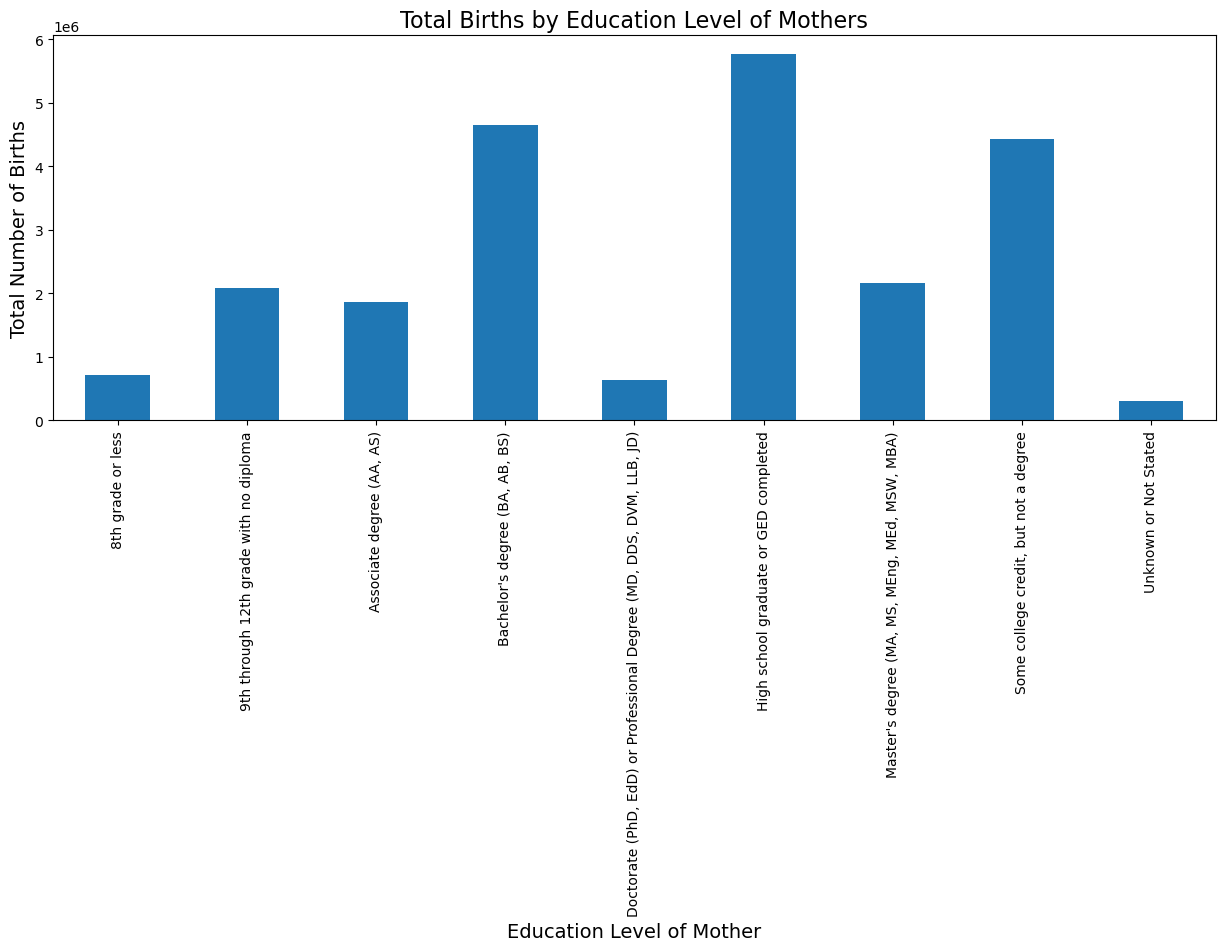

In [43]:
# Grouping data
education_level = df.groupby('Education Level of Mother')['Number of Births'].sum()

# Creating the bar chart
plt.figure(figsize=(15, 5))
education_level.plot(kind='bar')

# Adding title and labels
plt.title('Total Births by Education Level of Mothers', fontsize=16)
plt.ylabel('Total Number of Births', fontsize=14)
plt.xlabel('Education Level of Mother', fontsize=14)

# Show the plot
plt.tight_layout()
#Save Image
plt.savefig("../Visuals/TotalBirthsbyEducation.png")
plt.show()

In [44]:
ed_numb_state_df=df[["State","Education Level of Mother", "Number of Births"]]
ed_numb_state_df

,State,Education Level of Mother,Number of Births
0,Alabama,8th grade or less,1052
1,Alabama,9th through 12th grade with no diploma,3436
2,Alabama,High school graduate or GED completed,8777
3,Alabama,"Some college credit, but not a degree",6453
4,Alabama,"Associate degree (AA, AS)",2227
...,...,...,...
5491,Wyoming,"Associate degree (AA, AS)",401
5492,Wyoming,"Bachelor's degree (BA, AB, BS)",657
5493,Wyoming,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",261
5494,Wyoming,"Doctorate (PhD, EdD) or Professional Degree (M...",72


In [45]:
all_education= ed_numb_state_df['Education Level of Mother'].unique()
all_education

array(['8th grade or less', '9th through 12th grade with no diploma',
       'High school graduate or GED completed',
       'Some college credit, but not a degree',
       'Associate degree (AA, AS)', "Bachelor's degree (BA, AB, BS)",
       "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",
       'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)',
       'Unknown or Not Stated'], dtype=object)

In [46]:
all_states= ed_numb_state_df['State'].unique()
all_states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

C:\Users\micah\AppData\Local\Temp\ipykernel_7244\230779629.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

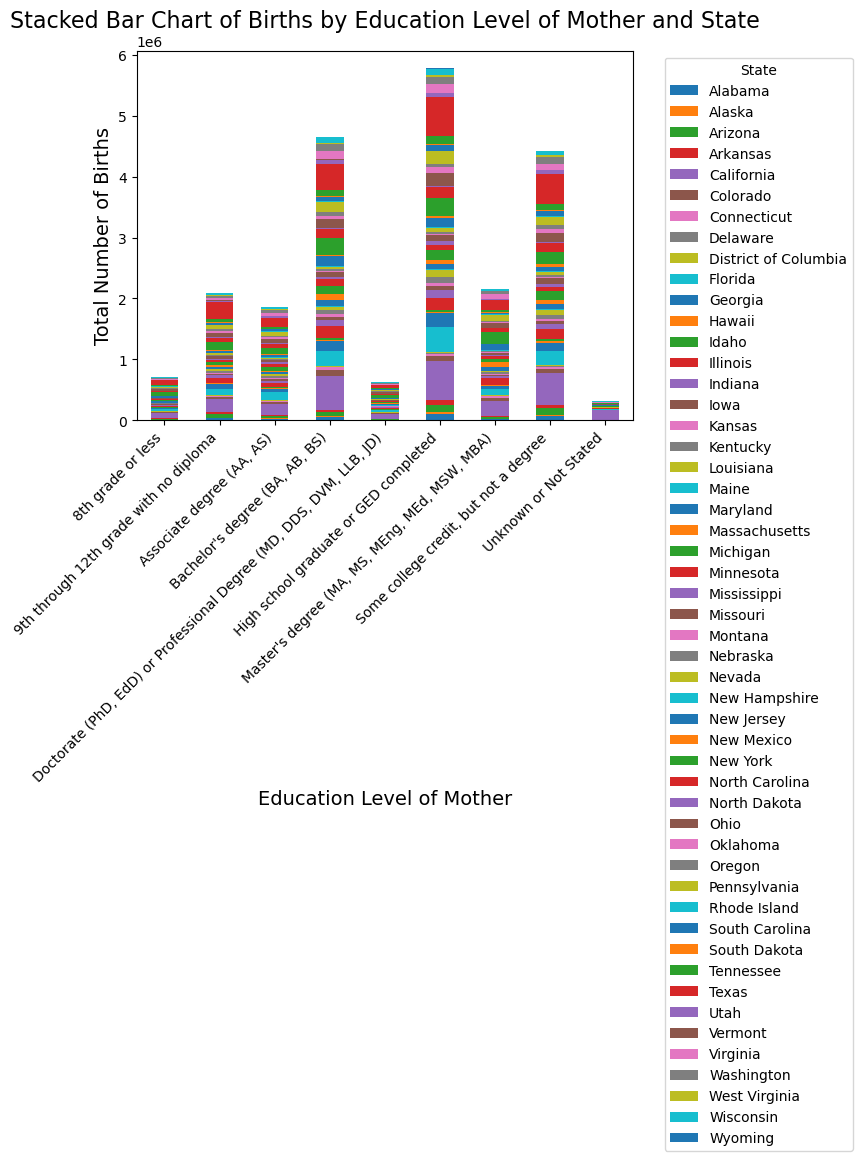

In [47]:
# List all unique states and education levels
all_states = ed_numb_state_df['State'].unique()
all_education_levels = ed_numb_state_df['Education Level of Mother'].unique()

# Grouping the data by education level and state
bar_chart_stacked = ed_numb_state_df.groupby(['Education Level of Mother', 'State'])['Number of Births'].sum().unstack()

# Fill missing values with 0 to ensure all states are represented
bar_chart_stacked = bar_chart_stacked.reindex(all_states, axis=1).fillna(0)

# Creating the stacked bar chart
plt.figure(figsize=(10, 6))
bar_chart_stacked.plot(kind='bar', stacked=True, color=plt.cm.tab10.colors)

# Adding title and labels
plt.title('Stacked Bar Chart of Births by Education Level of Mother and State', fontsize=16)
plt.xlabel('Education Level of Mother', fontsize=14)
plt.ylabel('Total Number of Births', fontsize=14)

# Rotate x-tick labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
#Save Image
plt.savefig("../Visuals/BirthsbyEducationandState.png")
plt.show()

<Figure size 1000x1500 with 0 Axes>

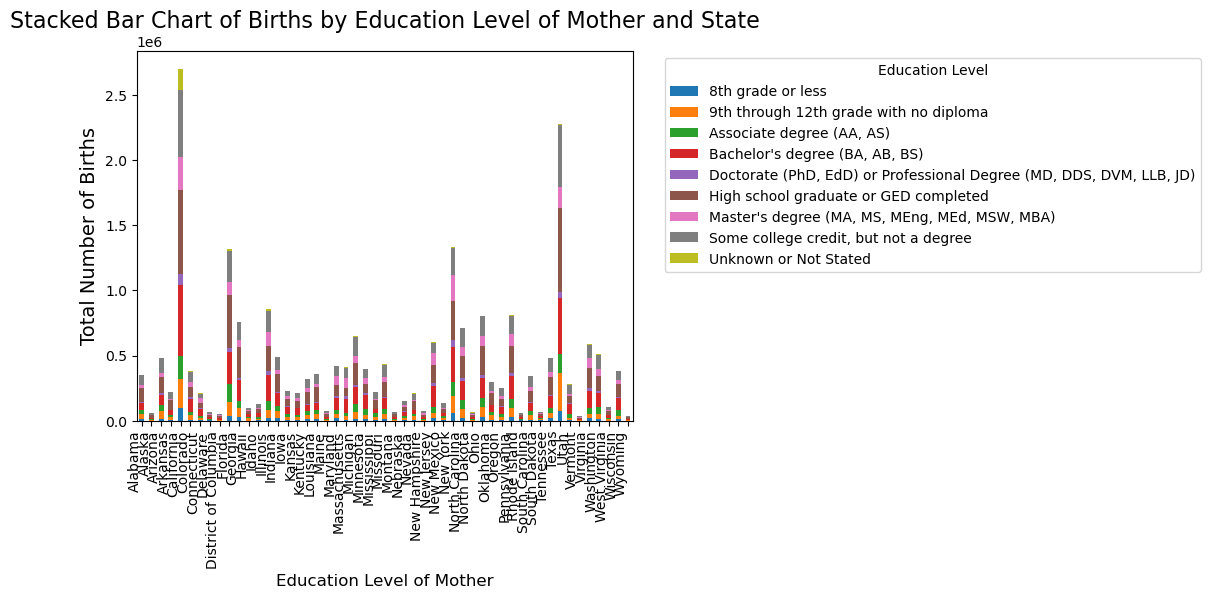

In [48]:
all_states = ed_numb_state_df['State'].unique()
all_education_levels = ed_numb_state_df['Education Level of Mother'].unique()

# Grouping the data by education level and state
bar_chart_stacked = ed_numb_state_df.groupby(['State','Education Level of Mother'])['Number of Births'].sum().unstack()


# Creating the stacked bar chart
plt.figure(figsize=(10, 15))
bar_chart_stacked.plot(kind='bar', stacked=True, color=plt.cm.tab10.colors)

# Adding title and labels
plt.title('Stacked Bar Chart of Births by Education Level of Mother and State', fontsize=16)
plt.xlabel('Education Level of Mother', fontsize=12)
plt.ylabel('Total Number of Births', fontsize=14)

# Rotate x-tick labels if necessary
plt.xticks(rotation=90, ha='right')

# Show the plot

plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
#Save Image
plt.savefig("../Visuals/BirthsbyStateandEducation.png")
plt.show()

In [49]:
ed_age_df=df[["Education Level of Mother", 'Average Age of Mother (years)']]
ed_age_df

,Education Level of Mother,Average Age of Mother (years)
0,8th grade or less,27.8
1,9th through 12th grade with no diploma,24.1
2,High school graduate or GED completed,25.4
3,"Some college credit, but not a degree",26.7
4,"Associate degree (AA, AS)",28.9
...,...,...
5491,"Associate degree (AA, AS)",29.2
5492,"Bachelor's degree (BA, AB, BS)",30.7
5493,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",33.0
5494,"Doctorate (PhD, EdD) or Professional Degree (M...",33.3


C:\Users\micah\AppData\Local\Temp\ipykernel_7244\175123533.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


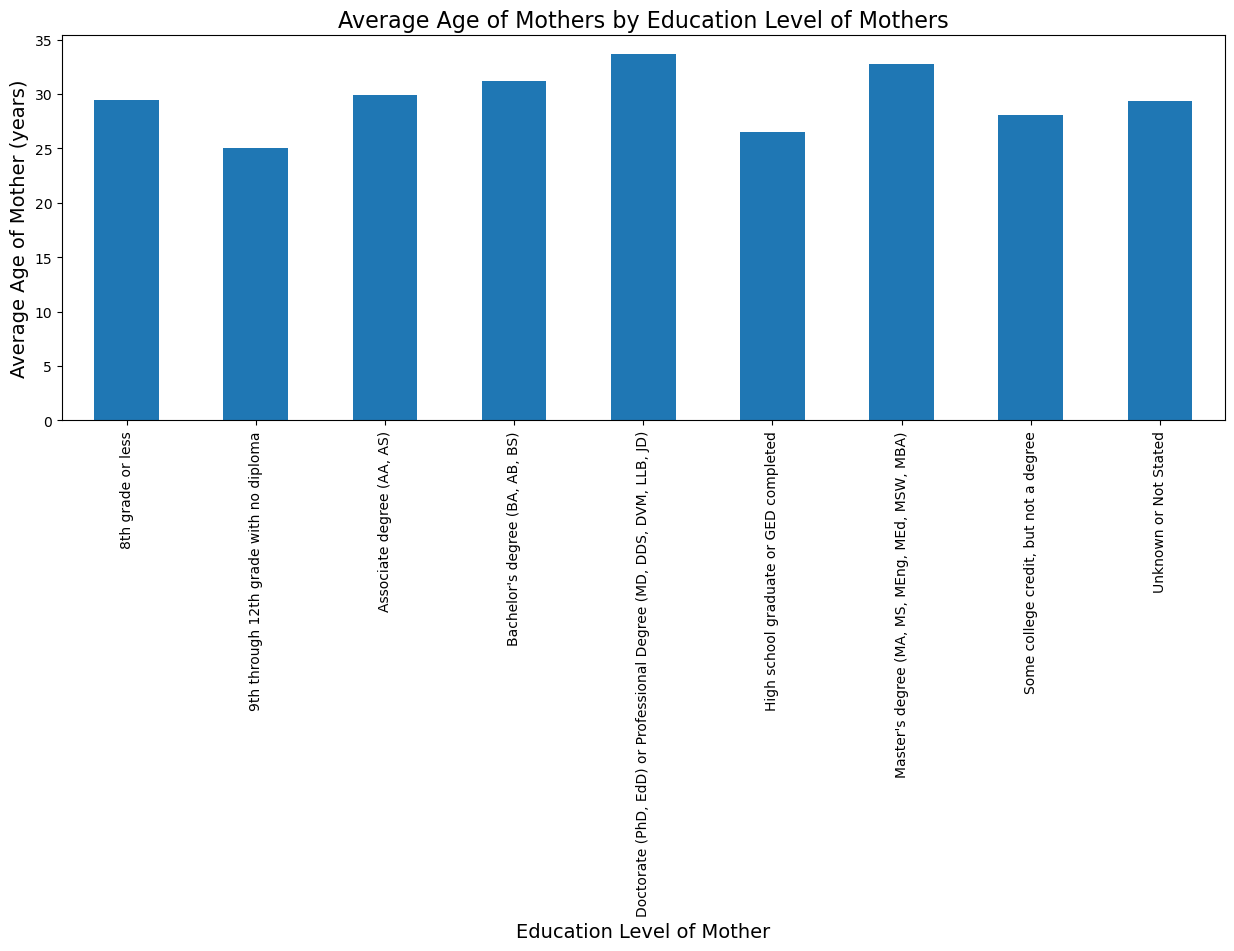

In [50]:
education_level = df.groupby('Education Level of Mother') ['Average Age of Mother (years)'].mean()

# Creating the bar chart
plt.figure(figsize=(15, 5))
education_level.plot(kind='bar')

# Adding title and labels
plt.title('Average Age of Mothers by Education Level of Mothers', fontsize=16)
plt.ylabel('Average Age of Mother (years)', fontsize=14)
plt.xlabel('Education Level of Mother', fontsize=14)

# Show the plot
plt.tight_layout()
#Save Image
plt.savefig("../Visuals/AverageAgeofMothers.png")
plt.show()

In [51]:
age_weight_df=df[['Average Birth Weight (g)', 'Average Age of Mother (years)']]
age_weight_df

,Average Birth Weight (g),Average Age of Mother (years)
0,3116.9,27.8
1,3040.0,24.1
2,3080.0,25.4
3,3121.9,26.7
4,3174.3,28.9
...,...,...
5491,3261.1,29.2
5492,3286.0,30.7
5493,3249.3,33.0
5494,3262.0,33.3


In [ ]:
# Assuming age_weight_df is already defined

# Calculate the mean values
#mean_age = age_weight_df['Average Age of Mother (years)'].mean()
#mean_birth_weight = age_weight_df['Average Birth Weight (g)'].mean()

# Create a DataFrame for plotting
#mean_df = pd.DataFrame({
#    ': ['Average Age of Mother', 'Average Birth Weight'],
#    'Value': [mean_age, mean_birth_weight]
#})

# Creating the bar chart
#plt.figure(figsize=(10, 5))
#plt.bar(mean_df['Metric'], mean_df['Value'], color=['skyblue', 'lightgreen'])

# Adding title and labels
#plt.title('Mean of Average Age of Mother and Average Birth Weight', fontsize=16)
#plt.ylabel('Value', fontsize=14)
#plt.xlabel('Metrics', fontsize=14)

# Show the plot
#plt.tight_layout()
#plt.show()